<h1>
<b>MakeMore : Neural Network</b>
</h1>

In [33]:
import torch
import matplotlib.pyplot as plt

In [22]:
words=[]
with open('names.txt','r') as f:
    words=f.read().splitlines()
# words
len(words)

32033

In [24]:
# prerequisites

all_chars=sorted(list(set(''.join(words))))
stoi={ch:i+1 for i,ch in enumerate(all_chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}      #stoi.items returns a tuple with key and value pairs
# itos

N=torch.zeros((27,27), dtype= torch.int32)
# N


In [43]:
# create the training set of all the bigrams(x,y)
xs, ys= [],[]
for w in words[:1]:
    chs=['.'] +list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2= stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)


xs=torch.tensor(xs)
ys = torch.tensor(ys)        

. e
e m
m m
m a
a .


In [44]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [45]:
xenc.shape

torch.Size([5, 27])

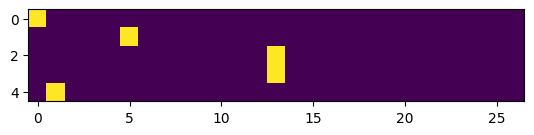

In [46]:
plt.imshow(xenc)

In [47]:
xenc.dtype

torch.float32

In [69]:
W= torch.randn((27,27))
(xenc @ W) 
# @ operator is matrix multiplication. we are doing dot product of xenc and W

tensor([[ 0.6177,  0.8584,  0.2193,  0.5120, -1.7037, -1.6461,  0.3151, -0.7498,
         -0.1397, -1.0804, -0.9874, -1.2920, -0.7885, -1.5587,  0.2720,  2.2049,
          0.2270, -0.9231,  0.3579,  1.0197, -1.1544, -0.9961,  0.7504, -1.1221,
          0.0632,  0.8156,  1.2028],
        [ 0.1456, -0.0185, -3.0173, -0.6349,  0.1100,  1.5027,  0.8324,  0.8916,
         -0.3637,  0.5017,  0.7817,  1.6454,  2.3658, -0.0386, -0.0920, -1.0145,
         -0.6451, -0.0083, -1.2843,  1.8359, -0.7501,  1.2462,  0.2918,  0.7823,
         -1.4247,  0.0590,  0.6816],
        [ 0.0310, -0.0831, -0.8083, -0.0057,  0.4580,  0.9969,  1.2505, -0.2712,
         -0.9419, -1.0620,  0.0531, -0.0077, -0.5793,  0.7553, -0.6986, -1.2788,
         -0.3175,  0.9203,  0.6678, -0.0360, -0.5985, -0.1538, -1.0119, -1.4142,
         -0.5850,  0.7537,  0.2086],
        [ 0.0310, -0.0831, -0.8083, -0.0057,  0.4580,  0.9969,  1.2505, -0.2712,
         -0.9419, -1.0620,  0.0531, -0.0077, -0.5793,  0.7553, -0.6986, -1.2788

In [70]:
logits= xenc @ W        # log- counts
counts = logits.exp()   # equivalent to tensor N in bigram
probs = counts/counts.sum(1, keepdims= True)
probs

tensor([[0.0490, 0.0623, 0.0329, 0.0440, 0.0048, 0.0051, 0.0362, 0.0125, 0.0230,
         0.0090, 0.0098, 0.0073, 0.0120, 0.0056, 0.0346, 0.2394, 0.0331, 0.0105,
         0.0378, 0.0732, 0.0083, 0.0097, 0.0559, 0.0086, 0.0281, 0.0597, 0.0879],
        [0.0212, 0.0180, 0.0009, 0.0097, 0.0205, 0.0825, 0.0422, 0.0448, 0.0128,
         0.0303, 0.0401, 0.0951, 0.1955, 0.0177, 0.0167, 0.0067, 0.0096, 0.0182,
         0.0051, 0.1151, 0.0087, 0.0638, 0.0246, 0.0401, 0.0044, 0.0195, 0.0363],
        [0.0341, 0.0304, 0.0147, 0.0329, 0.0522, 0.0895, 0.1154, 0.0252, 0.0129,
         0.0114, 0.0348, 0.0328, 0.0185, 0.0703, 0.0164, 0.0092, 0.0241, 0.0829,
         0.0644, 0.0319, 0.0182, 0.0283, 0.0120, 0.0080, 0.0184, 0.0702, 0.0407],
        [0.0341, 0.0304, 0.0147, 0.0329, 0.0522, 0.0895, 0.1154, 0.0252, 0.0129,
         0.0114, 0.0348, 0.0328, 0.0185, 0.0703, 0.0164, 0.0092, 0.0241, 0.0829,
         0.0644, 0.0319, 0.0182, 0.0283, 0.0120, 0.0080, 0.0184, 0.0702, 0.0407],
        [0.0069, 0.1064,

In [60]:
probs.shape

torch.Size([5, 27])

In [61]:
probs[0].sum()

tensor(1.)

In [ ]:
'''
Summary till now: Doing above steps:
'''

In [71]:
xs

tensor([ 0,  5, 13, 13,  1])

In [72]:
ys

tensor([ 5, 13, 13,  1,  0])

In [73]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [75]:

xenc=F.one_hot(xs, num_classes=27).float()      #input to the neural network : one- hot encoding
logits= xenc @W         #predict log_counts
counts= logits.exp()        #counts, equivalent to N in bigram model
probs= counts/counts.sum(1, keepdims= True)     #probabilities for next character
#last two lines here are together called a 'softmax'



In [76]:
probs.shape

torch.Size([5, 27])

In [77]:
nlls= torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item()  #input character index
    y = ys[i].item()    # label character index
    print('-------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]}(indexes {x},{y})')
    print('input to the neural net: ',x)
    print('output probabilities from the neural net: ', probs[i])
    print('label (actual next character): ', y)
    p= probs[i,y]
    print('probability assigned by the net to the correct character: ', p.item())
    logp=torch.log(p)
    print('log likelihood: ', logp.item())
    nll= -logp
    print('negative log likelihood: ',nll.item())
    nlls[i]=nll
print('==================')
print('average negative log likelihood, i.e. loss=', nlls.mean().item())

-------------
bigram example 1: .e(indexes 0,5)
input to the neural net:  0
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character):  5
probability assigned by the net to the correct character:  0.012286253273487091
log likelihood:  -4.3992743492126465
negative log likelihood:  4.3992743492126465
-------------
bigram example 2: em(indexes 5,13)
input to the neural net:  5
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character):  13
probability assigned by the net to the correct c

-----------!!! OPTIMIZATION !!! yay------------

In [102]:
# forward pass

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)


xenc=F.one_hot(xs, num_classes=27).float()      #input to the neural network : one- hot encoding
logits= xenc @W         #predict log_counts
counts= logits.exp()        #counts, equivalent to N in bigram model
probs= counts/counts.sum(1, keepdims= True)     #probabilities for next character
#last two lines here are together called a 'softmax'

In [103]:
probs.shape

torch.Size([5, 27])

In [104]:
probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [105]:
# we can do above cell process differently as follows:
torch.arange(5)
probs[torch.arange(5), ys]      #this is prob... we want log prob , then we will take mean() then put negative... i.e. we get nll as following cell


tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [106]:
loss= -probs[torch.arange(5), ys].log().mean()
loss.item()

3.7693049907684326

In [107]:
# Backward pass
W.grad=None     # set the gradient to zero
loss.backward() 

In [108]:
# W.grad

In [109]:
W.shape

torch.Size([27, 27])

In [110]:
# update

W.data+= -0.1 * W.grad

In [111]:
 print(loss.item())

3.7693049907684326
